# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

from config import api_key

# Import API key

# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)


f1a313cf23f6bc32f92edeffe96219ac


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



# Print the city count to confirm sufficient count
len(cities)



629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

query_url
city="Arlington, Virginia"

response = requests.get(query_url + city).json()
#response["main"]["temp"]
query_url
response

{'coord': {'lon': -97.11, 'lat': 32.74},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 16.48,
  'pressure': 1023,
  'humidity': 42,
  'temp_min': 15,
  'temp_max': 17.78},
 'visibility': 16093,
 'wind': {'speed': 6.2, 'deg': 310},
 'clouds': {'all': 1},
 'dt': 1575659932,
 'sys': {'type': 1,
  'id': 4228,
  'country': 'US',
  'sunrise': 1575638215,
  'sunset': 1575674536},
 'timezone': -21600,
 'id': 4671240,
 'name': 'Arlington',
 'cod': 200}

In [4]:
# set up lists to hold reponse info

citiesTemperature= pd.DataFrame(cities, columns=["Cities"])
citiesTemperature["Latitude"]=""
citiesTemperature["Longtitude"]=""
citiesTemperature["Temperature"]=""
citiesTemperature["Humidity"]=""
citiesTemperature["Wind speed"]=""
citiesTemperature["Cloudiness"]=""




citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,cherskiy,,,,,,
1,mataura,,,,,,
2,port elizabeth,,,,,,
3,ushuaia,,,,,,
4,falealupo,,,,,,


In [5]:
# Loop through the list of cities and perform a request for data on each

# call requests:
#response["coord"]["lon"]
#response["coord"]["lat"]
#response["name"]
#response["main"]["humidity"]
#response["wind"]["speed"]
#response["clouds"]["all"]
#response["dt"]

DateRetrieved= pd.to_datetime('today').strftime("%m/%d/%Y")

for index, row in citiesTemperature.iterrows():
        city = row['Cities']
    
        try:
            response = requests.get(query_url + city).json()
            tem=response['main']["temp_max"]
            weather= response["weather"][0]["description"]
            
            #temp.append(response['main']['temp'])
            citiesTemperature.loc[index, "Cities"] = response["name"]
            citiesTemperature.loc[index, "Latitude"] = response["coord"]["lat"]
            citiesTemperature.loc[index, "Longtitude"] = response["coord"]["lon"]
            citiesTemperature.loc[index, "Temperature"] = response['main']["temp_max"]
            citiesTemperature.loc[index, "Humidity"] = response["main"]["humidity"]
            citiesTemperature.loc[index, "Wind speed"] = response["wind"]["speed"]
            citiesTemperature.loc[index, "Cloudiness"] = response["clouds"]["all"]
            print(f"The max temperature of {city} today  is: {tem} and the weather is {weather}")

        except:
            #citiesTemperature.loc[index, "Cities"] = "No Values"
            #print(f"Missing Value")
            continue
            
        



The max temperature of cherskiy today  is: -20.17 and the weather is broken clouds
The max temperature of mataura today  is: 11.67 and the weather is scattered clouds
The max temperature of port elizabeth today  is: 13 and the weather is clear sky
The max temperature of ushuaia today  is: 10 and the weather is shower rain
The max temperature of buin today  is: 29 and the weather is scattered clouds
The max temperature of rikitea today  is: 23.69 and the weather is light rain
The max temperature of antalaha today  is: 27.12 and the weather is light rain
The max temperature of hobart today  is: 12 and the weather is broken clouds
The max temperature of fortuna today  is: 16.67 and the weather is few clouds
The max temperature of yellowknife today  is: -25 and the weather is broken clouds
The max temperature of katsuura today  is: 7 and the weather is broken clouds
The max temperature of broome today  is: 9.44 and the weather is scattered clouds
The max temperature of jamestown today  is:

The max temperature of zanjan today  is: -1.29 and the weather is overcast clouds
The max temperature of mugur-aksy today  is: -13.91 and the weather is overcast clouds
The max temperature of georgetown today  is: 30 and the weather is scattered clouds
The max temperature of angoche today  is: 25.7 and the weather is scattered clouds
The max temperature of isabela today  is: 21.44 and the weather is broken clouds
The max temperature of tuktoyaktuk today  is: -15 and the weather is light snow
The max temperature of paldiski today  is: 7.78 and the weather is light intensity drizzle
The max temperature of raudeberg today  is: 4 and the weather is light rain
The max temperature of vavoua today  is: 28.44 and the weather is clear sky
The max temperature of hilo today  is: 21 and the weather is light rain
The max temperature of ankang today  is: 3.72 and the weather is clear sky
The max temperature of mayachnyy today  is: 1.06 and the weather is overcast clouds
The max temperature of ust-ts

The max temperature of mgandu today  is: 20.58 and the weather is light rain
The max temperature of tuatapere today  is: 11.67 and the weather is moderate rain
The max temperature of butaritari today  is: 27.61 and the weather is overcast clouds
The max temperature of lexington today  is: 11.67 and the weather is overcast clouds
The max temperature of cukai today  is: 25 and the weather is light rain
The max temperature of tiksi today  is: -30.79 and the weather is overcast clouds
The max temperature of kandiaro today  is: 18.66 and the weather is clear sky
The max temperature of toamasina today  is: 24 and the weather is scattered clouds
The max temperature of pisco today  is: 22 and the weather is clear sky
The max temperature of machaneng today  is: 26.13 and the weather is scattered clouds
The max temperature of piacabucu today  is: 28.79 and the weather is few clouds
The max temperature of odessa today  is: 16.11 and the weather is clear sky
The max temperature of basco today  is:

The max temperature of makakilo city today  is: 24 and the weather is light rain
The max temperature of nagato today  is: 8 and the weather is light intensity shower rain
The max temperature of najran today  is: 16 and the weather is clear sky
The max temperature of canon city today  is: 2 and the weather is clear sky
The max temperature of yar-sale today  is: -24.65 and the weather is broken clouds
The max temperature of norman wells today  is: -24 and the weather is light snow
The max temperature of loandjili today  is: 28 and the weather is few clouds
The max temperature of lavrentiya today  is: -10.49 and the weather is clear sky
The max temperature of bredasdorp today  is: 18.89 and the weather is broken clouds
The max temperature of itoman today  is: 16 and the weather is moderate rain
The max temperature of pacifica today  is: 19 and the weather is overcast clouds
The max temperature of dosso today  is: 26.78 and the weather is few clouds
The max temperature of rio grande today 

The max temperature of cedar falls today  is: 3 and the weather is scattered clouds
The max temperature of soe today  is: 5.56 and the weather is light rain
The max temperature of sines today  is: 13.33 and the weather is clear sky
The max temperature of vaitape today  is: 27.6 and the weather is light rain
The max temperature of ambilobe today  is: 27.48 and the weather is light rain
The max temperature of boysun today  is: 6.31 and the weather is scattered clouds
The max temperature of ranfurly today  is: -5.93 and the weather is broken clouds
The max temperature of coihaique today  is: 19 and the weather is few clouds
The max temperature of dourbali today  is: 25.96 and the weather is clear sky
The max temperature of ensley today  is: 11.11 and the weather is moderate rain
The max temperature of ahuimanu today  is: 24 and the weather is light rain
The max temperature of hede today  is: 2.22 and the weather is few clouds
The max temperature of mutsu today  is: -0.56 and the weather i

The max temperature of port hardy today  is: 7 and the weather is light rain
The max temperature of cap-aux-meules today  is: -1 and the weather is light snow
The max temperature of smirnykh today  is: -16.22 and the weather is broken clouds
The max temperature of diamantino today  is: 30.36 and the weather is overcast clouds
The max temperature of pasighat today  is: 13.99 and the weather is clear sky
The max temperature of coahuayana today  is: 31.52 and the weather is few clouds
The max temperature of salinopolis today  is: 27.58 and the weather is scattered clouds
The max temperature of teya today  is: 30 and the weather is scattered clouds
The max temperature of dwarka today  is: 20.56 and the weather is fog
The max temperature of eyl today  is: 26.9 and the weather is moderate rain
The max temperature of tarpon springs today  is: 24.44 and the weather is clear sky
The max temperature of broken hill today  is: 15 and the weather is clear sky
The max temperature of waingapu today  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#reformatting and cleaning data

citiesTemperature["Temperature"]=pd.to_numeric(citiesTemperature["Temperature"], downcast='float')
citiesTemperature["Longtitude"]=pd.to_numeric(citiesTemperature["Longtitude"], downcast='float')
citiesTemperature["Latitude"]=pd.to_numeric(citiesTemperature["Latitude"], downcast='float')
citiesTemperature["Humidity"]=pd.to_numeric(citiesTemperature["Humidity"], downcast='float')
citiesTemperature["Wind speed"]=pd.to_numeric(citiesTemperature["Wind speed"], downcast='float')
citiesTemperature["Cloudiness"]=pd.to_numeric(citiesTemperature["Cloudiness"], downcast='float')


citiesTemperature=citiesTemperature.dropna(how="any")

citiesTemperature.dtypes
citiesTemperature.to_csv("Weather Report.csv",index=False)
citiesTemperature.to_html("WeatherData.html",classes=["table-bordered", "table-striped", "table-hover"])
citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,Cherskiy,68.750000,161.300003,-20.17,70.0,0.91,66.0
1,Mataura,-46.189999,168.860001,11.67,88.0,0.50,36.0
2,Port Elizabeth,39.310001,-74.980003,13.00,50.0,1.50,1.0
3,Ushuaia,-54.810001,-68.309998,10.00,66.0,12.90,75.0
5,Buin,-33.730000,-70.739998,29.00,23.0,5.10,36.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

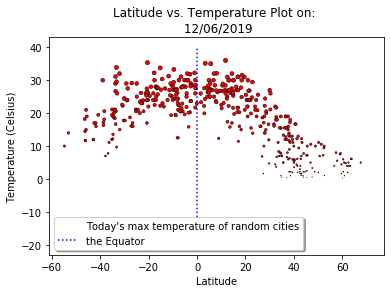

In [17]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Temperature"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.',
            linewidth=0.5,
            label="Today's max temperature of random cities",
            facecolors="red", edgecolors="black",
            s=2*y)
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Temperature Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.vlines(0,-20,40, alpha=1, color='blue', label='the Equator', linestyles='dotted')
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Temperature Plot.png",dpi=200)
plt.show()

#### Latitude vs. Humidity Plot

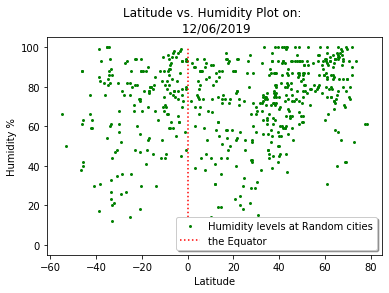

In [18]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Humidity"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='green', linewidth=0, label="Humidity levels at Random cities")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Humidity Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.vlines(0,0,100, alpha=1, color='red', label='the Equator', linestyles='dotted')
plt.legend(loc='best', framealpha =1,shadow = True ) 


# Show the Figure
plt.savefig("Images/Latitude vs. Humidity Plot.png",dpi=200)
plt.show()


#### Latitude vs. Cloudiness Plot

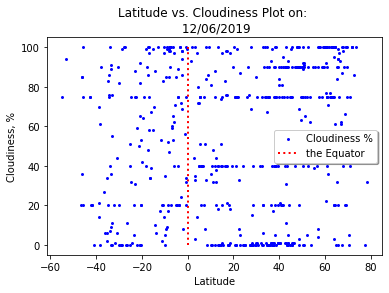

In [19]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Cloudiness"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='blue', linewidth=0,label="Cloudiness %")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Cloudiness Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness, %")
plt.vlines(0,0,100,
           color='red',
           label='the Equator',
           linestyles='dotted',
           linewidth=2)

plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Cloudiness.png",dpi=200)
plt.show()

#### Latitude vs. Wind Speed Plot

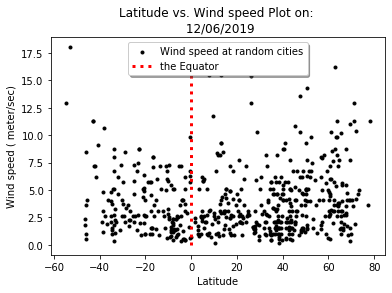

In [20]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Wind speed"]


#plotting the axises
plt.scatter(x_axis,
            y,marker ='.',
            color='black',
            linewidth=1,
            label="Wind speed at random cities",
            )
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Wind speed Plot on: \n {DateRetrieved}" )
plt.xlabel("Latitude")
plt.ylabel("Wind speed ( meter/sec)")
plt.vlines(0,0,18, alpha=1, color='red', label='the Equator', linestyles='dotted', linewidth=3)
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Wind speed Plot.png",dpi=200)
plt.show()

## Observations

1. There seems to be a strong visual indication of a relationship between current temperature and proximity to the equator. As cities are located closer to the equator the current temperature seems to rise. 

2. There is no visual indication of any relationship between humidity and cloudiness.

3. But there seems to be some visual correlation between current wind speed and proximity to the Equator.